<a href="https://colab.research.google.com/github/Israel-Garcilazo/EDP1/blob/main/Polinomios_De_Legendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polinomios de Legendre con SymPy y SciPy

##Este cuaderno utiliza las librerías `sympy` y `scipy` para trabajar con polinomios de Legendre y resolver los ejercicios de la siguiente imagen:##

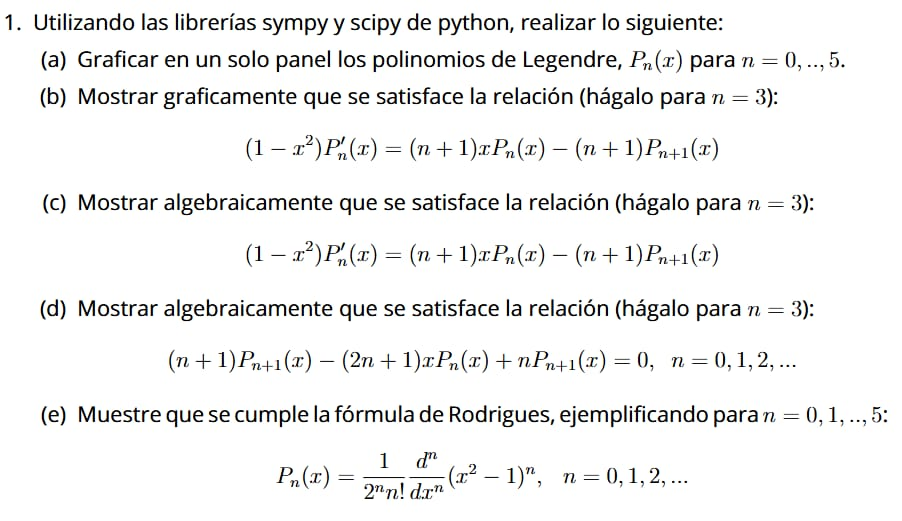

## Inciso (a) - Graficar los polinomios de Legendre $P_n(x)$ para $n = 0, \ldots, 5$

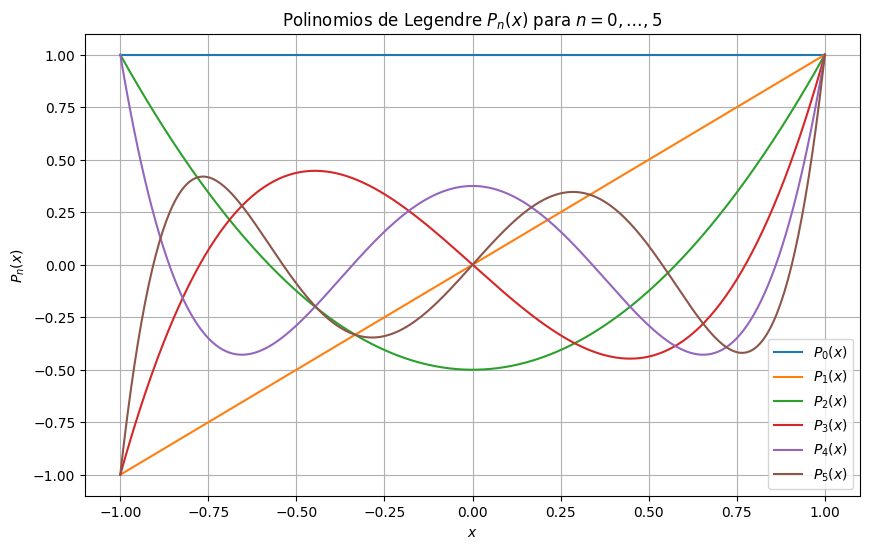

In [16]:

# Llamámos las librerías solicitadas.
!pip install numdifftools
from scipy.special import legendre
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd

#Generamos el entorno de la gráfica.
x_vals = np.linspace(-1, 1, 400)
plt.figure(figsize=(10, 6))

# ciclo que hace uso de la función directa de ScyPi para calcular los polinomios de legendre.
for n in range(6):
    Pn = legendre(n)
# Líneas que grafican las funciones.
    plt.plot(x_vals, Pn(x_vals), label=f'$P_{n}(x)$')
plt.title("Polinomios de Legendre $P_n(x)$ para $n = 0, \ldots, 5$")
plt.xlabel('$x$')
plt.ylabel('$P_n(x)$')
plt.grid(True)
plt.legend()
plt.show()


## Inciso (b) - Verificar gráficamente la identidad para $n=3$

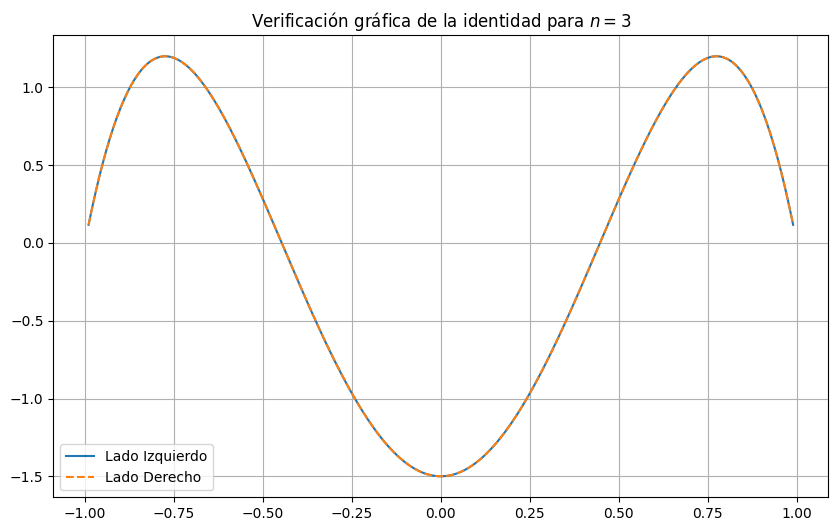

In [17]:

n = 3
Pn = legendre(n)
Pn1 = legendre(n+1)

# Derivada numérica de Pn usando numdifftools debido a que lo intenté hacer por ScyPi y debido a un problema de compatibilidad que no me dejaba utilizar la función de derivación.
def Pn_prime(x):
    return nd.Derivative(Pn)(x)
# Líneas que reemplazan el valor de n en los polinomios de legendre.
lhs = lambda x: (1 - x**2) * Pn_prime(x)
rhs = lambda x: (n+1) * x * Pn(x) - (n+1) * Pn1(x)

x_vals = np.linspace(-0.99, 0.99, 400)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, lhs(x_vals), label="Lado Izquierdo")
plt.plot(x_vals, rhs(x_vals), label="Lado Derecho", linestyle='--')
plt.title("Verificación gráfica de la identidad para $n=3$")
plt.legend()
plt.grid(True)
plt.show()

## Inciso (c) - Verificar algebraicamente la identidad para $n=3$

La siguiente parte del código hace e imprime los cálculos de los polinomios de Legendre. Primero se muestra el desarrollo y como debe de dar cero para que se compruebe la identidad, la última línea muestra el resultado de la diferencia entre ambos lados de la igualdad y si este es cero se entiende que está bien.

In [18]:

from sympy import symbols, legendre as sp_legendre, simplify, diff

x = symbols('x')
n = 3
Pn = sp_legendre(n, x)
Pn1 = sp_legendre(n+1, x)

lhs = (1 - x**2) * diff(Pn, x)
rhs = (n + 1) * x * Pn - (n + 1) * Pn1

# Mostrar el desarrollo
print("Parte izquierda de la igualdad:")
display(lhs)

print("Parte derecha de la igualdad")
display(rhs)

print("La diferencia entre ambas partes es:")
simplify(lhs - rhs)


Parte izquierda de la igualdad:


(1 - x**2)*(15*x**2/2 - 3/2)

Parte derecha de la igualdad


-35*x**4/2 + 15*x**2 + 4*x*(5*x**3/2 - 3*x/2) - 3/2

La diferencia entre ambas partes es:


0

## Inciso (d) - Verificar algebraicamente otra identidad para $n=3$

Este paso hace el proceso analogo al del inciso anterior.

In [19]:

n = 3
Pn = sp_legendre(n, x)
Pn1 = sp_legendre(n+1, x)
Pn_1 = sp_legendre(n-1, x)

# Se verifica que la diferencia de los polinomios de Legendre de cero: (n + 1)P_{n+1}(x) - (2n + 1)xP_n(x) + nP_{n-1}(x) = 0
expr = (n + 1) * Pn1 - (2 * n + 1) * x * Pn + n * Pn_1
print("Expresión a verificar:")
display(expr)

print("La diferencia entre ambas partes es:")
simplify(expr)


Expresión a verificar:


35*x**4/2 - 21*x**2/2 - 7*x*(5*x**3/2 - 3*x/2)

La diferencia entre ambas partes es:


0

## Inciso (e) - Verificar la fórmula de Rodrigues para $n = 0, \ldots, 5$

Y por ultimo para la fórmula de Rodrigues, analogo a los dos incisos anteriores.

In [20]:

from sympy import factorial, Function

def rodrigues(n):
    return (1 / (2**n * factorial(n))) * diff((x**2 - 1)**n, x, n)
# Este ciclo va a imprimir sucesivamente los polinomios de Legendre junto con los terminos de la fórmula de Rodrigues y va a verificar que da cero al hacer la diferencia entre ellos.
for n in range(6):
    Pn_rodrigues = simplify(rodrigues(n))
    Pn_legendre = sp_legendre(n, x)
    print(f"n = {n}")
    print("Rodrigues:")
    display(Pn_rodrigues)
    print("Legendre:")
    display(Pn_legendre)
    print("La diferencia entre ambas partes es:")
    display(simplify(Pn_rodrigues - Pn_legendre))


n = 0
Rodrigues:


1

Legendre:


1

La diferencia entre ambas partes es:


0

n = 1
Rodrigues:


x

Legendre:


x

La diferencia entre ambas partes es:


0

n = 2
Rodrigues:


3*x**2/2 - 1/2

Legendre:


3*x**2/2 - 1/2

La diferencia entre ambas partes es:


0

n = 3
Rodrigues:


x*(5*x**2 - 3)/2

Legendre:


5*x**3/2 - 3*x/2

La diferencia entre ambas partes es:


0

n = 4
Rodrigues:


35*x**4/8 - 15*x**2/4 + 3/8

Legendre:


35*x**4/8 - 15*x**2/4 + 3/8

La diferencia entre ambas partes es:


0

n = 5
Rodrigues:


x*(63*x**4 - 70*x**2 + 15)/8

Legendre:


63*x**5/8 - 35*x**3/4 + 15*x/8

La diferencia entre ambas partes es:


0